# Slice and plot


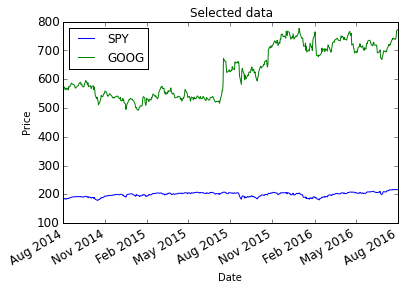

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

def plot_selected(df, columns, start_index, end_index):

    plot_data(df.ix[start_index:end_index,columns], title="Selected data")
    # df = df.ix[start_index: end_index, columns]
    # print df
    # df.plot()
    # plt.show()

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2014-08-01', '2016-08-01')

    # Choose stock symbols to read
    symbols = ['SPY', 'TSLA', 'GOOG']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)

    # Slice and plot
    plot_selected(df, ['SPY', 'GOOG'], '2014-08-01', '2016-08-01')


if __name__ == "__main__":
    test_run()
